In [4]:
import numpy as np
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv("financial_dataset_8nov.csv")
df

,TransactionID,Date,AccountID,Amount,Category,Merchant,PaymentMethod,Location,Currency,Notes,IsFraud,CreatedAt
0,1,2020-01-01 00:00:00,1102,2904.074759,Salary,Store C,Debit Card,City B,USD,NaN,0,2020-01-01 00:00:00
1,2,2020-01-01 00:01:00,1435,-3062.610670,Utilities,Store C,Credit Card,City D,USD,Gift,0,2020-01-01 00:01:00
2,3,2020-01-01 00:02:00,1860,-2382.471310,Groceries,Store B,Credit Card,City B,GBP,Payment for service,0,2020-01-01 00:02:00
3,4,2020-01-01 00:03:00,1270,NaN,Utilities,Store D,Credit Card,City C,EUR,Refund,0,2020-01-01 00:03:00
4,5,2020-01-01 00:04:00,1106,-1693.991900,Rent,Store D,Credit Card,City C,EUR,Gift,0,2020-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2020-01-14 21:15:00,1884,2639.760846,Utilities,Store B,Debit Card,City D,EUR,NaN,0,2020-01-14 21:15:00
19996,19997,2020-01-14 21:16:00,1796,-4301.039426,NaN,Store B,Cash,City B,EUR,Payment for service,0,2020-01-14 21:16:00
19997,19998,2020-01-14 21:17:00,1001,-147.857625,Entertainment,Store B,Debit Card,City D,EUR,NaN,0,2020-01-14 21:17:00
19998,19999,2020-01-14 21:18:00,1232,-1762.244207,NaN,Store D,Credit Card,City B,GBP,Refund,0,2020-01-14 21:18:00


# 1). Data Quality and Cleaning

In [14]:
#1.1)	How many missing values exist in each column, and what percentage of the data is missing ?

# Count missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Display the results
print("missing values :\n",missing_values) 
print("\n")
print("missing percentage : \n",missing_percentage)


missing values :
 TransactionID       0
Date                0
AccountID           0
Amount           1923
Category         1900
Merchant         1919
PaymentMethod       0
Location            0
Currency            0
Notes            8026
IsFraud             0
CreatedAt           0
dtype: int64


missing percentage : 
 TransactionID     0.000
Date              0.000
AccountID         0.000
Amount            9.615
Category          9.500
Merchant          9.595
PaymentMethod     0.000
Location          0.000
Currency          0.000
Notes            40.130
IsFraud           0.000
CreatedAt         0.000
dtype: float64


In [44]:
#Q1.2)	What strategies can be applied to handle missing values in the Amount, Category, and Merchant columns?

df['Amount'].fillna(df['Amount'].median(), inplace=True)
print(df['Amount'])

0        2904.074759
1       -3062.610670
2       -2382.471310
3          35.326259
4       -1693.991900
            ...     
19995    2639.760846
19996   -4301.039426
19997    -147.857625
19998   -1762.244207
19999    3499.393108
Name: Amount, Length: 20000, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_6816\3909872229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)


In [38]:
# Fixing the FutureWarning by avoiding inplace=True
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])
df['Merchant'] = df['Merchant'].fillna(df['Merchant'].mode()[0])

# Alternatively, if replacing with 'Unknown' for investigation
df['Category'] = df['Category'].fillna('Unknown')
df['Merchant'] = df['Merchant'].fillna('Unknown')

# Display the updated DataFrame
print(df[['Category', 'Merchant']])


            Category Merchant
0             Salary  Store C
1          Utilities  Store C
2          Groceries  Store B
3          Utilities  Store D
4               Rent  Store D
...              ...      ...
19995      Utilities  Store B
19996      Utilities  Store B
19997  Entertainment  Store B
19998      Utilities  Store D
19999      Utilities  Store A

[20000 rows x 2 columns]


In [45]:
#Q 1.3)	Are there any duplicate TransactionIDs in the dataset?

#Check for duplicate TransactionIDs
duplicate_transaction_ids = df['TransactionID'].duplicated()

# Count the number of duplicate TransactionIDs
duplicate_count = df['TransactionID'].duplicated().sum()

# Display the result
duplicate_count


0

# 2. Descriptive Analysis

In [46]:
#Q2.1)	What is the overall distribution of Amount (e.g., mean, median, standard deviation)?

# Get summary statistics for 'Amount' column
amount_stats = df['Amount'].describe()

# Display the result
amount_stats


count    20000.000000
mean        25.252674
std       2746.109914
min      -4999.518761
25%      -2187.892449
50%         35.326259
75%       2250.664030
max       4999.248268
Name: Amount, dtype: float64

In [47]:
#Q2.2)	How many transactions occurred for each Category?


# Count transactions for each Category
category_counts = df['Category'].value_counts()

# Display the result
category_counts



Category
Utilities        3684
Entertainment    3635
Groceries        3612
Salary           3610
Rent             3559
Name: count, dtype: int64

In [10]:
#Q2.3)	What are the top 5 most frequent Merchants and Locations?

# Top 5 most frequent Merchants
top_5_merchants = df['Merchant'].value_counts().head(5)

# Top 5 most frequent Locations
top_5_locations = df['Location'].value_counts().head(5)

# Display the results
print(f"\nTop 5 merchants :{top_5_merchants} {"\n"} Top 5 locations are :{top_5_locations}")



Top 5 merchants :Merchant
Store D    4600
Store A    4526
Store B    4523
Store C    4432
Name: count, dtype: int64 
 Top 5 locations are :Location
City A    5084
City C    5017
City B    5016
City D    4883
Name: count, dtype: int64


In [12]:
#Q3.1)	What percentage of transactions are marked as fraudulent (IsFraud)?

# Calculate the percentage of fraudulent transactions
fraud_percentage = (df['IsFraud'].mean()) * 100

# Display the result
print("Fraud PErcentage are :",fraud_percentage,"%")



Fraud PErcentage are : 4.715 %


In [58]:
#Q3.2)	Do fraudulent transactions have any noticeable patterns in terms of Category, Merchant, PaymentMethod, or Location?

# Count fraudulent transactions by Category, Merchant, PaymentMethod, and Location
fraud_by_category = df[df['IsFraud'] == 1]['Category'].value_counts()
fraud_by_merchant = df[df['IsFraud'] == 1]['Merchant'].value_counts()
fraud_by_payment_method = df[df['IsFraud'] == 1]['PaymentMethod'].value_counts()
fraud_by_location = df[df['IsFraud'] == 1]['Location'].value_counts()

# Count total transactions by Category, Merchant, PaymentMethod, and Location
total_by_category = df['Category'].value_counts()
total_by_merchant = df['Merchant'].value_counts()
total_by_payment_method = df['PaymentMethod'].value_counts()
total_by_location = df['Location'].value_counts()

# Calculate percentage of fraud by category, merchant, payment method, and location
fraud_percentage_category = (fraud_by_category / total_by_category) * 100
fraud_percentage_merchant = (fraud_by_merchant / total_by_merchant) * 100
fraud_percentage_payment_method = (fraud_by_payment_method / total_by_payment_method) * 100
fraud_percentage_location = (fraud_by_location / total_by_location) * 100

# Display the results
print("\nfraud_percentage_category : ",fraud_percentage_category)
print("\nfraud_percentage_merchant : ",fraud_percentage_merchant)
print("\nfraud_percentage_payment_method : ",fraud_percentage_payment_method)
print("\nfraud_percentage_location :" ,fraud_percentage_location)




fraud_percentage_category :  Category
Entertainment    4.456671
Groceries        4.429679
Rent             4.832818
Salary           5.207756
Utilities        4.478827
Name: count, dtype: float64

fraud_percentage_merchant :  Merchant
Store A    5.015466
Store B    4.952465
Store C    4.535199
Store D    4.434783
Name: count, dtype: float64

fraud_percentage_payment_method :  PaymentMethod
Cash           4.784184
Credit Card    4.721351
Debit Card     4.640024
Name: count, dtype: float64

fraud_percentage_location : Location
City A    4.661684
City B    4.485646
City C    4.983058
City D    4.730698
Name: count, dtype: float64


In [59]:
#Q3.3)	Are fraudulent transactions more likely to involve higher Amount values?

# Summary statistics for fraudulent transactions
fraudulent_stats = df[df['IsFraud'] == 1]['Amount'].describe()

# Summary statistics for non-fraudulent transactions
non_fraudulent_stats = df[df['IsFraud'] == 0]['Amount'].describe()

# Display the statistics
print("fraudulent_stats :",fraudulent_stats)
print("\n")
print("non_fraudulent_stats :",non_fraudulent_stats)


fraudulent_stats : count     943.000000
mean      141.124013
std      2726.938294
min     -4999.518761
25%     -2060.705319
50%        35.326259
75%      2424.707542
max      4982.517902
Name: Amount, dtype: float64


non_fraudulent_stats : count    19057.000000
mean        19.518998
std       2746.999273
min      -4998.897682
25%      -2194.097840
50%         35.326259
75%       2241.780351
max       4999.248268
Name: Amount, dtype: float64


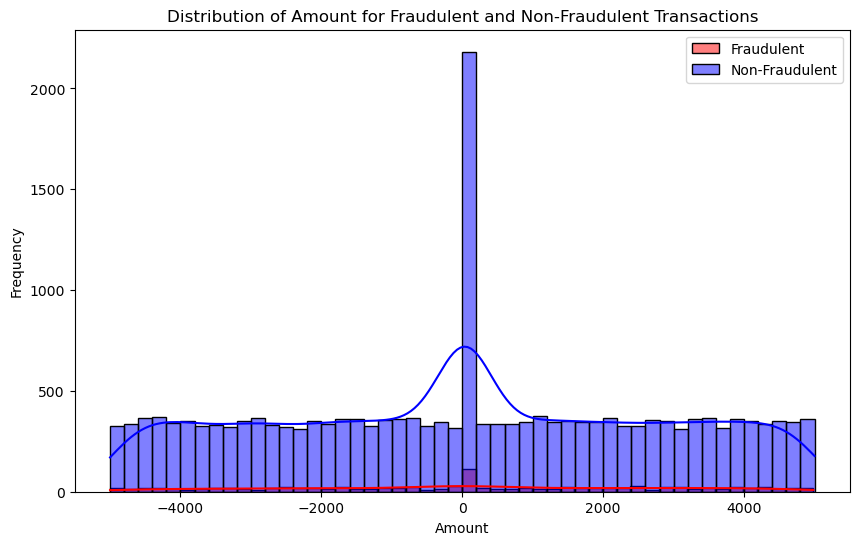

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['IsFraud'] == 1]['Amount'], color='red', label='Fraudulent', kde=True, bins=50)
sns.histplot(df[df['IsFraud'] == 0]['Amount'], color='blue', label='Non-Fraudulent', kde=True, bins=50)
plt.title('Distribution of Amount for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()




# 4. Time Series Analysis


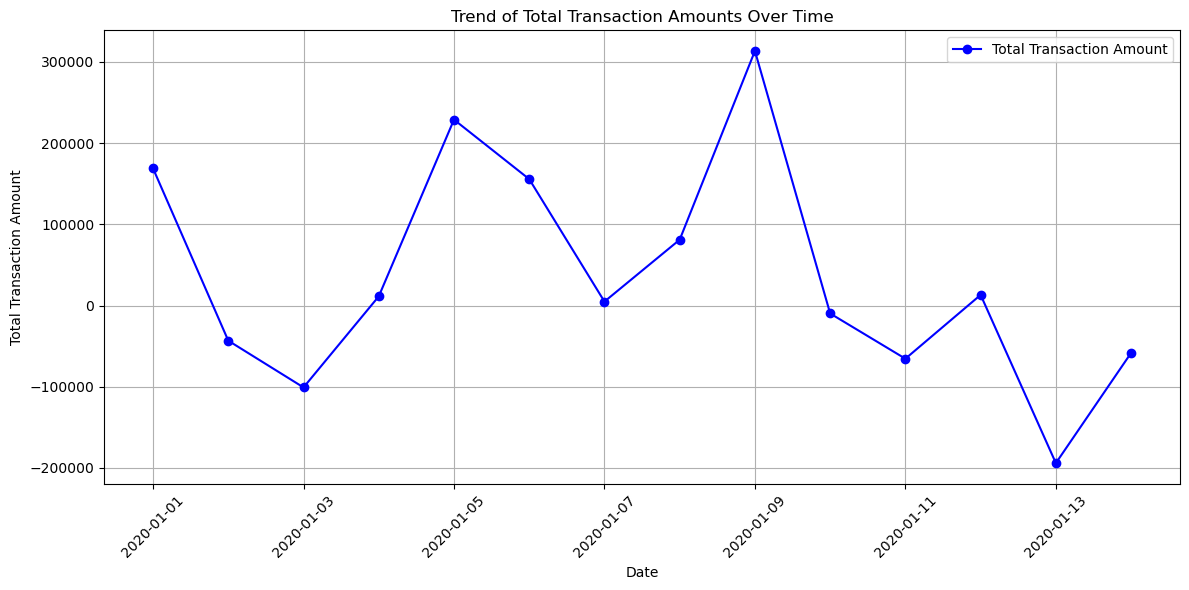

In [61]:
#Q4.1)	What is the trend of total transaction amounts over time?

# Convert 'Date' to datetime if it's not already in that format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate total transaction amount per day
total_amount_by_day = df.groupby(df['Date'].dt.date)['Amount'].sum()

# Plot the trend of total transaction amounts over time
plt.figure(figsize=(12, 6))
plt.plot(total_amount_by_day.index, total_amount_by_day.values, marker='o', color='b', label='Total Transaction Amount')
plt.title('Trend of Total Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


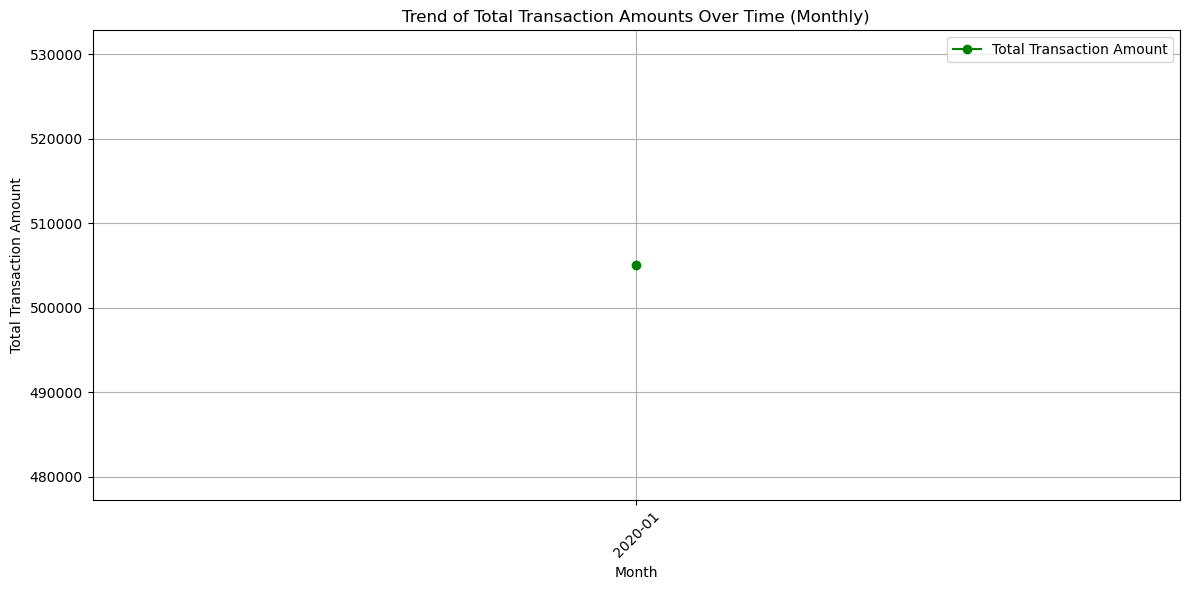

In [32]:
#Code for Monthly Trend:
# Group by month and calculate total transaction amount per month
total_amount_by_month = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Plot the trend of total transaction amounts per month
plt.figure(figsize=(12, 6))
plt.plot(total_amount_by_month.index.astype(str), total_amount_by_month.values, marker='o', color='g', label='Total Transaction Amount')
plt.title('Trend of Total Transaction Amounts Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
#Q4.2)	Are there specific days, weeks, or months with significantly higher or lower transaction volumes?
# by days::
# Group by day and calculate total transaction amount per day
total_amount_by_day = df.groupby(df['Date'].dt.date)['Amount'].sum()

# Identify days with significantly higher or lower transaction volumes
high_transaction_days = total_amount_by_day[total_amount_by_day > total_amount_by_day.mean() + total_amount_by_day.std()]
low_transaction_days = total_amount_by_day[total_amount_by_day < total_amount_by_day.mean() - total_amount_by_day.std()]

# Display results
high_transaction_days, low_transaction_days


(Date
 2020-01-05    228827.689751
 2020-01-09    313405.527353
 Name: Amount, dtype: float64,
 Date
 2020-01-13   -194011.899234
 Name: Amount, dtype: float64)

In [63]:
# by week
# Group by week (ISO year and week) and calculate total transaction amount per week
total_amount_by_week = df.groupby(df['Date'].dt.to_period('W'))['Amount'].sum()

# Identify weeks with significantly higher or lower transaction volumes
high_transaction_weeks = total_amount_by_week[total_amount_by_week > total_amount_by_week.mean() + total_amount_by_week.std()]
low_transaction_weeks = total_amount_by_week[total_amount_by_week < total_amount_by_week.mean() - total_amount_by_week.std()]

# Display results
high_transaction_weeks, low_transaction_weeks


(Series([], Freq: W-SUN, Name: Amount, dtype: float64),
 Date
 2020-01-13/2020-01-19   -252349.656165
 Freq: W-SUN, Name: Amount, dtype: float64)

In [65]:
# months.
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Group by month and calculate total transaction amount per month
total_amount_by_month = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Identify months with significantly higher or lower transaction volumes
high_transaction_months = total_amount_by_month[total_amount_by_month > total_amount_by_month.mean() + total_amount_by_month.std()]
low_transaction_months = total_amount_by_month[total_amount_by_month < total_amount_by_month.mean() - total_amount_by_month.std()]

# Display results
print(high_transaction_months)
print(low_transaction_months)


Series([], Freq: M, Name: Amount, dtype: float64)
Series([], Freq: M, Name: Amount, dtype: float64)


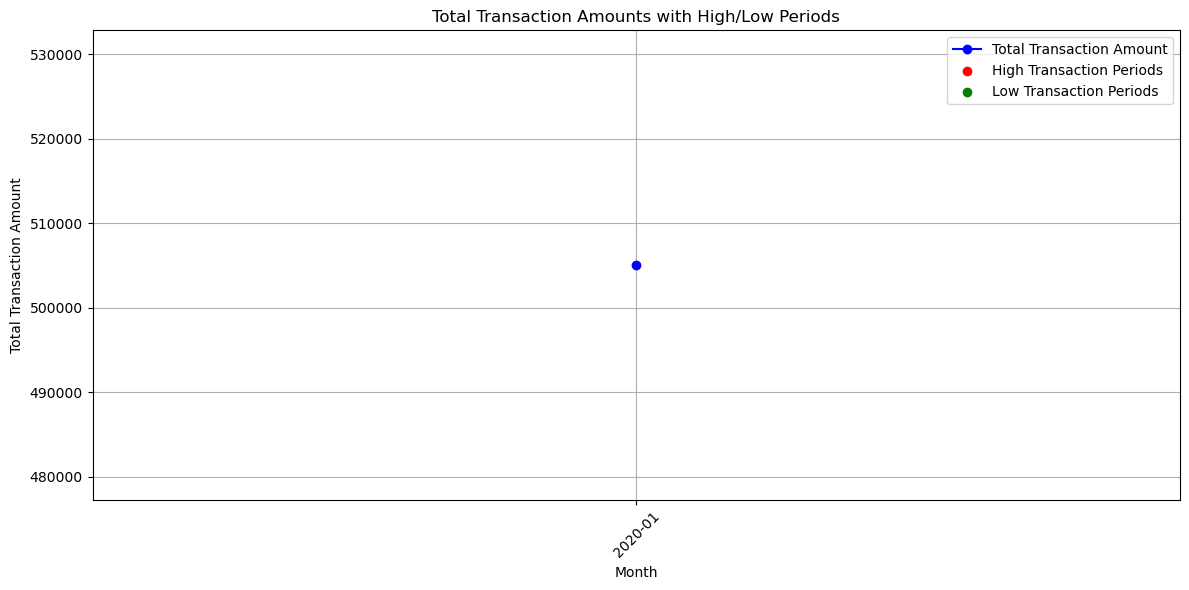

In [66]:
# visulizations
# Plot the trend of total transaction amounts with high/low periods
plt.figure(figsize=(12, 6))
plt.plot(total_amount_by_month.index.astype(str), total_amount_by_month.values, marker='o', color='b', label='Total Transaction Amount')

# Highlight high and low months
plt.scatter(high_transaction_months.index.astype(str), high_transaction_months.values, color='red', label='High Transaction Periods')
plt.scatter(low_transaction_months.index.astype(str), low_transaction_months.values, color='green', label='Low Transaction Periods')

plt.title('Total Transaction Amounts with High/Low Periods')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


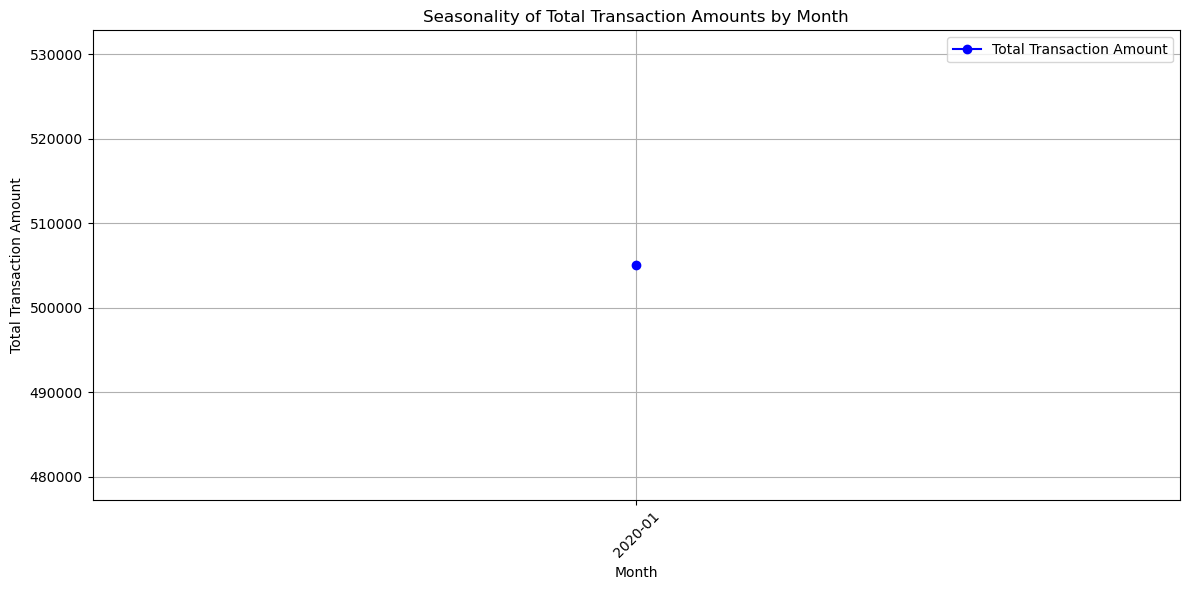

In [70]:
#Q4.3)	Can we identify seasonality patterns in transactions?

# by month…
# Group by month and calculate total transaction amount per month
total_amount_by_month = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Plot the trend of total transaction amounts per month to identify seasonality
plt.figure(figsize=(12, 6))
plt.plot(total_amount_by_month.index.astype(str), total_amount_by_month.values, marker='o', color='b', label='Total Transaction Amount')
plt.title('Seasonality of Total Transaction Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


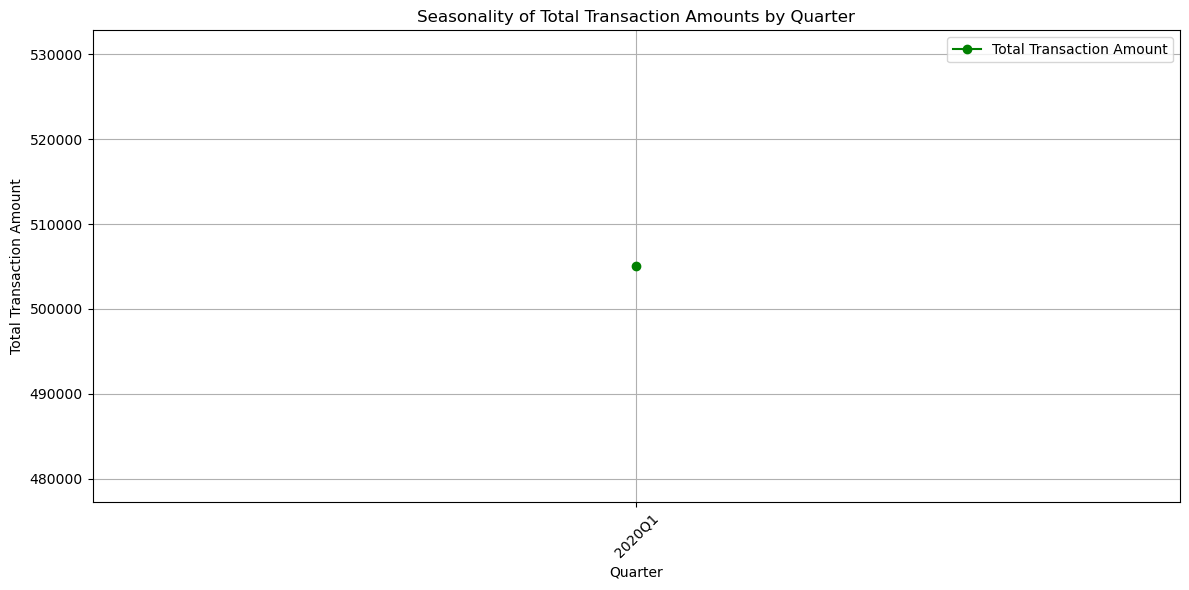

In [67]:
# by quarter
# Group by quarter and calculate total transaction amount per quarter
total_amount_by_quarter = df.groupby(df['Date'].dt.to_period('Q'))['Amount'].sum()

# Plot the trend of total transaction amounts by quarter
plt.figure(figsize=(12, 6))
plt.plot(total_amount_by_quarter.index.astype(str), total_amount_by_quarter.values, marker='o', color='g', label='Total Transaction Amount')
plt.title('Seasonality of Total Transaction Amounts by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
# day of the week.
# Group by day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday) and calculate total transaction amount per day
df['DayOfWeek'] = df['Date'].dt.dayofweek
total_amount_by_dayofweek = df.groupby('DayOfWeek')['Amount'].sum()
total_amount_by_dayofweek


DayOfWeek
0    -38416.699313
1    -53501.020808
2    249776.842506
3    270114.684971
4   -110619.076162
5    -54208.998673
6    241907.752101
Name: Amount, dtype: float64

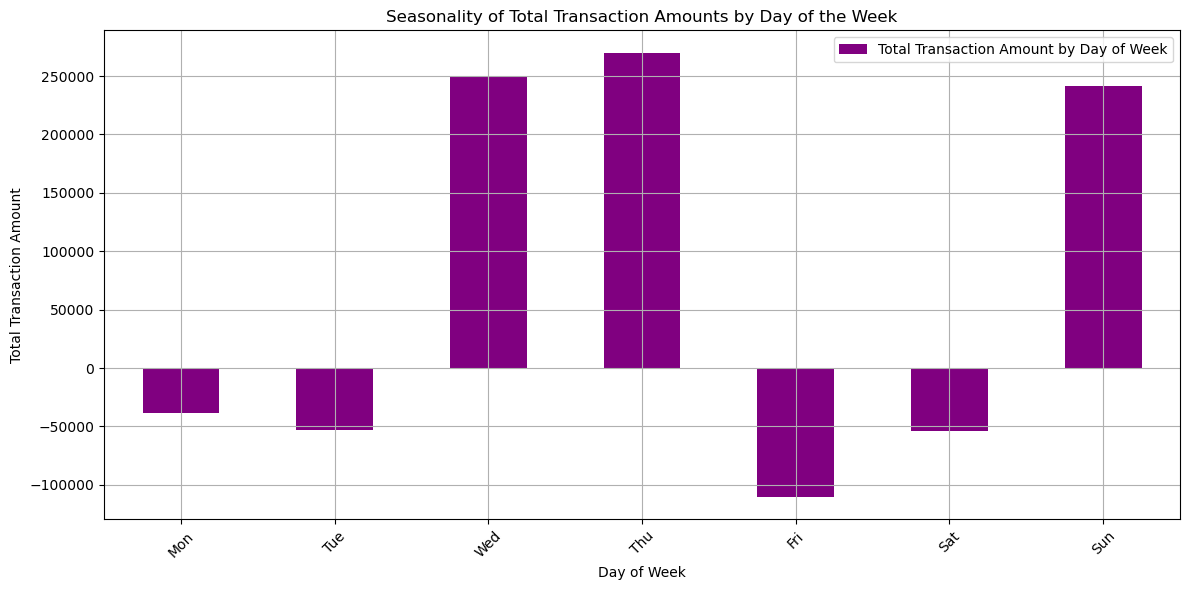

In [72]:
# Plot the trend of total transaction amounts by day of the week
plt.figure(figsize=(12, 6))
total_amount_by_dayofweek.plot(kind='bar', color='purple', label='Total Transaction Amount by Day of Week')
plt.title('Seasonality of Total Transaction Amounts by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Transaction Amount')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [74]:
# visulization :
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Check and clean data
total_amount_values = total_amount_by_month.dropna().values

if len(total_amount_values) > 1 and total_amount_by_month.nunique() > 1:
    # Autocorrelation plot
    plt.figure(figsize=(12, 6))
    autocorrelation_plot(total_amount_values)
    plt.title('Autocorrelation of Total Transaction Amounts')
    plt.show()
else:
    print("Insufficient or constant data for autocorrelation analysis.")


Insufficient or constant data for autocorrelation analysis.


# 5. Payment and Currency Insights

In [80]:
#Q5.1)  What is the breakdown of transactions by PaymentMethod?

# 1. Total Number of Transactions by PaymentMethod:
# Group by PaymentMethod and calculate the number of transactions for each method
transaction_count_by_paymentmethod = df.groupby('PaymentMethod').size()

# Display the result
transaction_count_by_paymentmethod


PaymentMethod
Cash           6626
Credit Card    6693
Debit Card     6681
dtype: int64

In [81]:
# 2. Total Transaction Amount by PaymentMethod :

# Group by PaymentMethod and calculate the total transaction amount for each method
total_amount_by_paymentmethod = df.groupby('PaymentMethod')['Amount'].sum()

# Display the result
total_amount_by_paymentmethod


PaymentMethod
Cash           374735.022092
Credit Card     63513.575047
Debit Card      66804.887483
Name: Amount, dtype: float64

In [82]:
#3. Percentage Breakdown of Transactions by PaymentMethod:
# Calculate percentage of transactions by each payment method
percentage_by_paymentmethod = (transaction_count_by_paymentmethod / len(df)) * 100

# Display the result
percentage_by_paymentmethod


PaymentMethod
Cash           33.130
Credit Card    33.465
Debit Card     33.405
dtype: float64

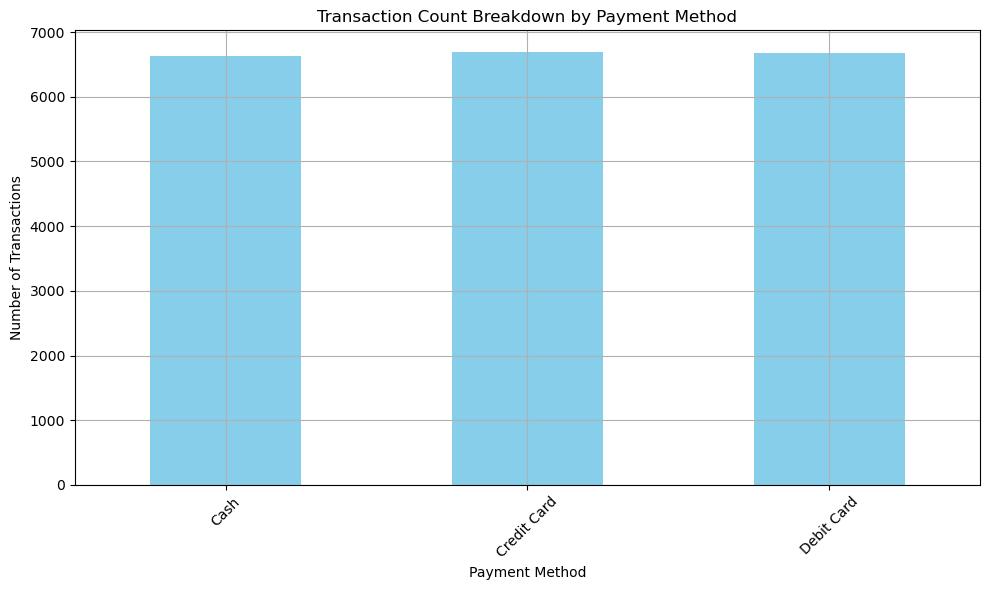

In [83]:
# Visualizing the Breakdown by PaymentMethod:
# Plot the total transaction count by PaymentMethod
plt.figure(figsize=(10, 6))
transaction_count_by_paymentmethod.plot(kind='bar', color='skyblue', label='Number of Transactions')
plt.title('Transaction Count Breakdown by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



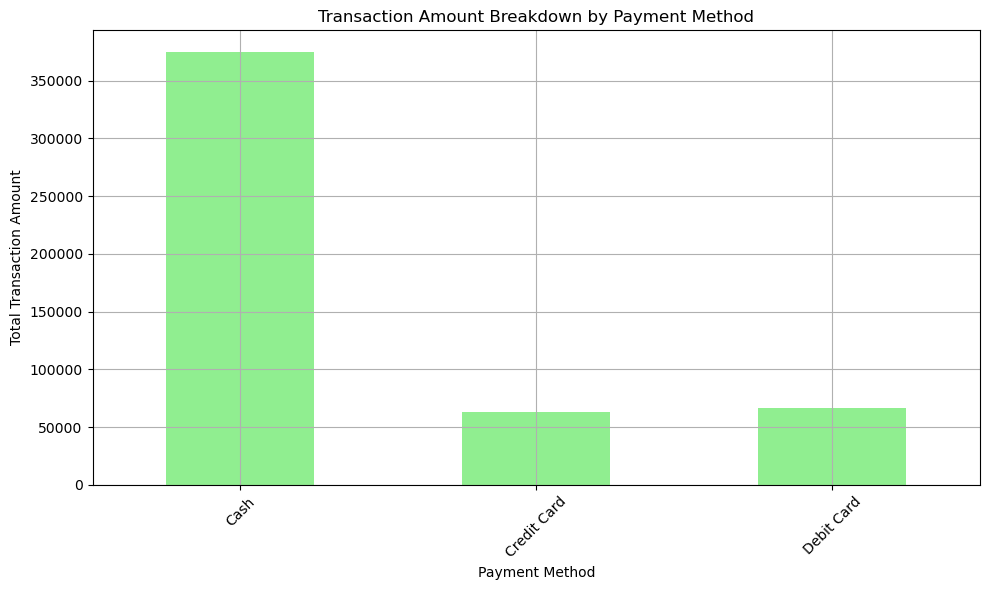

In [79]:
# Plot the total transaction amount by PaymentMethod
plt.figure(figsize=(10, 6))
total_amount_by_paymentmethod.plot(kind='bar', color='lightgreen', label='Total Transaction Amount')
plt.title('Transaction Amount Breakdown by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
# 5.2)  How does the distribution of Amount vary across different Currency values?

#Summary Statistics by Currency :
# Group by Currency and calculate summary statistics for Amount
currency_stats = df.groupby('Currency')['Amount'].describe()

# Display the result
currency_stats


,count,mean,std,min,25%,50%,75%,max
Currency,,,,,,,,
EUR,6668.0,11.049732,2743.280750,-4998.897682,-2212.767190,35.326259,2231.765733,4996.732052
GBP,6668.0,25.538812,2735.581665,-4999.518761,-2153.405509,35.326259,2256.933104,4999.248268
USD,6664.0,39.177832,2759.759828,-4998.422554,-2200.284664,35.326259,2264.790640,4998.051441


In [120]:
# Count total transactions
total_transactions = len(df)

# Count transactions in USD
usd_transactions = len(df[df['Currency'] == 'USD'])

# Calculate the percentage of USD transactions
usd_percentage = (usd_transactions / total_transactions) * 100

# Display the result
print(f"Percentage of USD transactions: {usd_percentage:.2f}%")



Percentage of USD transactions: 33.32%


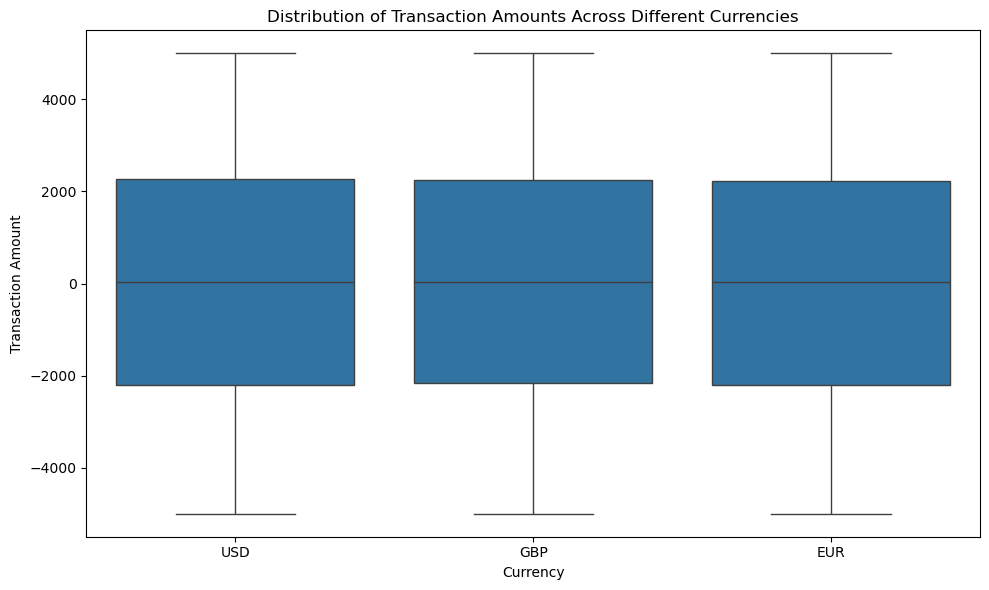

In [97]:
# Boxplot to Visualize the Distribution:
# Plot a boxplot to compare the distribution of Amount across different currencies
plt.figure(figsize=(10, 6))
sns.boxplot(x='Currency', y='Amount', data=df)
plt.title('Distribution of Transaction Amounts Across Different Currencies')
plt.xlabel('Currency')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()



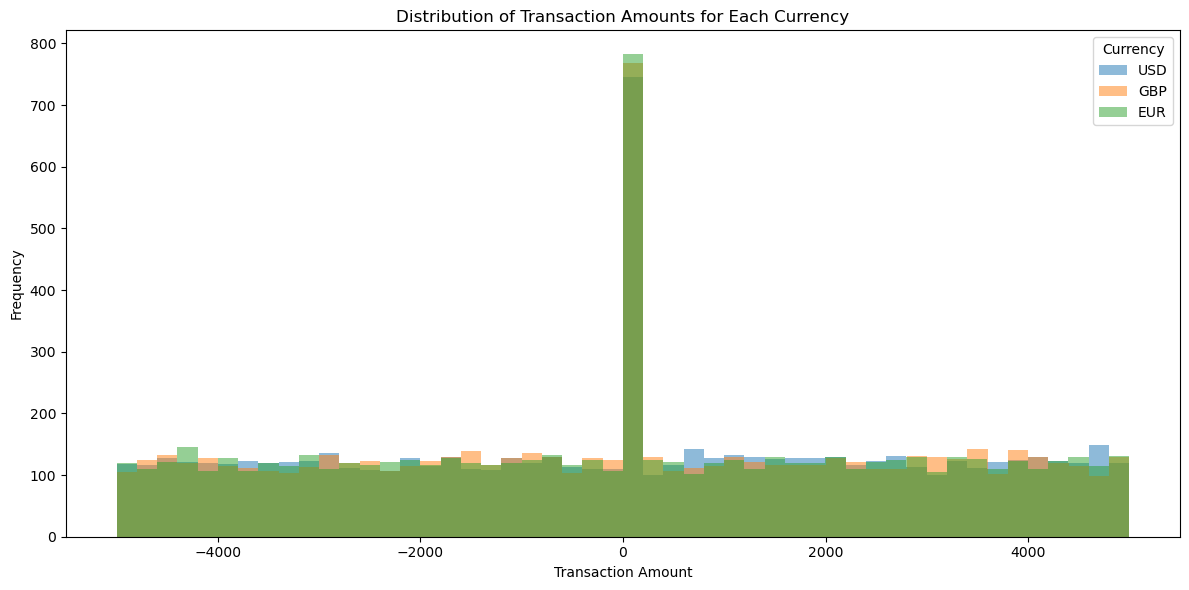

In [98]:
# Histogram for Each Currency:
# Plot histograms of Amount for each Currency
plt.figure(figsize=(12, 6))
for currency in df['Currency'].unique():
    subset = df[df['Currency'] == currency]
    plt.hist(subset['Amount'], bins=50, alpha=0.5, label=currency)

plt.title('Distribution of Transaction Amounts for Each Currency')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Currency')
plt.tight_layout()
plt.show()

In [99]:
#5.3)  Are specific payment methods associated with higher frequencies of fraud?

# Steps to Analyze Fraud by Payment Method:
#1. Calculate the Percentage of Fraudulent Transactions by Payment Method:
# Group by PaymentMethod and IsFraud, then calculate the number of fraudulent transactions
fraud_by_paymentmethod = df.groupby(['PaymentMethod', 'IsFraud']).size().unstack(fill_value=0)

# Calculate the percentage of fraudulent transactions for each PaymentMethod
fraud_percentage_by_paymentmethod = (fraud_by_paymentmethod[1] / fraud_by_paymentmethod.sum(axis=1)) * 100

# Display the result
fraud_percentage_by_paymentmethod


PaymentMethod
Cash           4.784184
Credit Card    4.721351
Debit Card     4.640024
dtype: float64

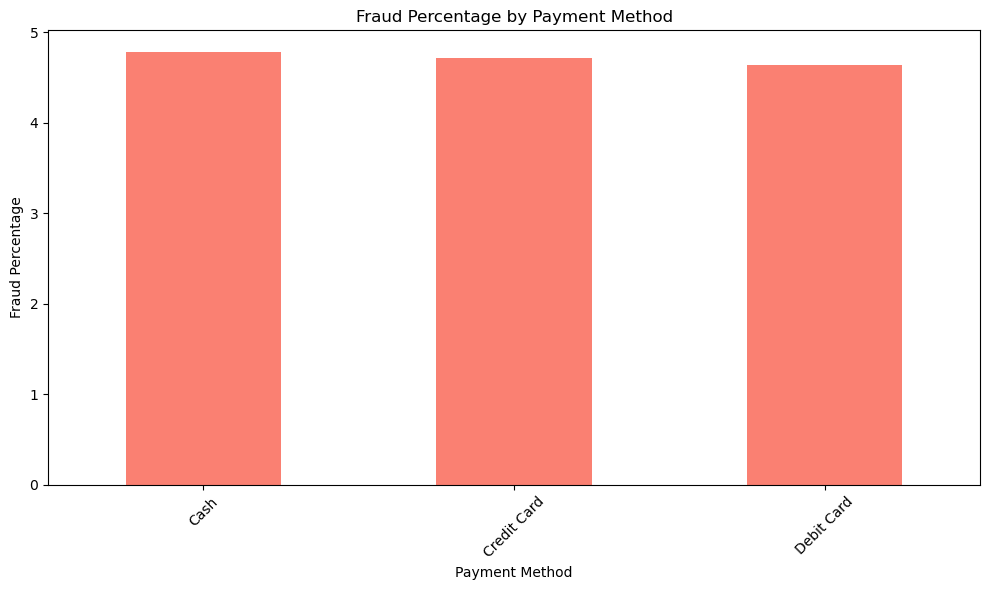

In [100]:
# Visualize Fraud Frequency by Payment Method:
# Plot the fraud percentage for each payment method
plt.figure(figsize=(10, 6))
fraud_percentage_by_paymentmethod.plot(kind='bar', color='salmon', label='Fraud Percentage')
plt.title('Fraud Percentage by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


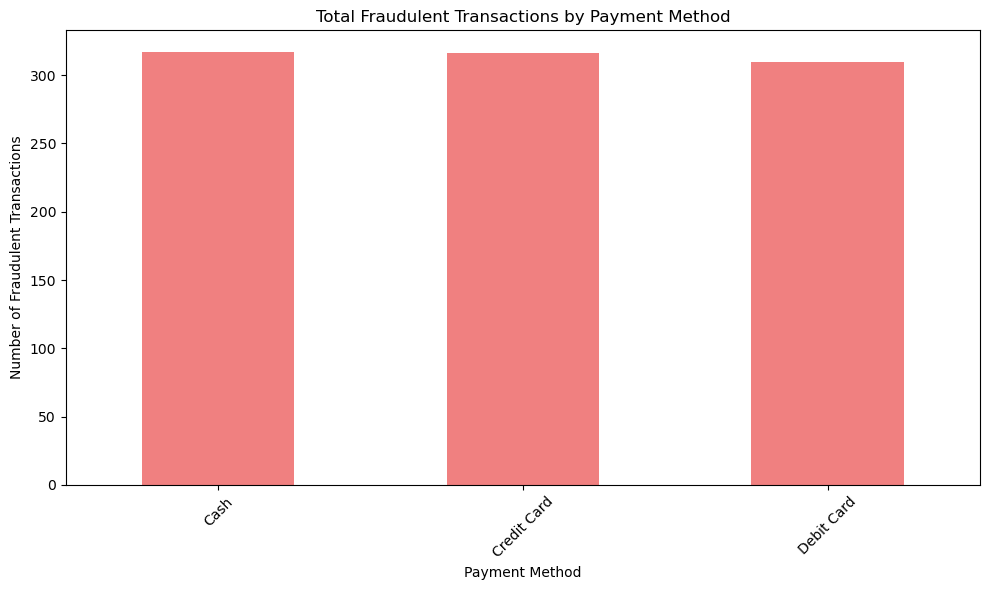

In [16]:
# Compare the Number of Fraudulent Transactions by Payment Method:
# Calculate the total number of fraudulent transactions by PaymentMethod
total_fraud_by_paymentmethod = fraud_by_paymentmethod[1]

# Plot the total number of fraudulent transactions for each payment method
plt.figure(figsize=(10, 6))
total_fraud_by_paymentmethod.plot(kind='bar', color='lightcoral', label='Total Fraudulent Transactions')
plt.title('Total Fraudulent Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. Revenue and Expenses Analysis

In [121]:
# 6.1)  What is the total income (positive Amount) versus expenses (negative Amount) for the dataset?

# Steps to Calculate Total Income and Expenses:
#1. Calculate Total Income (positive Amount):

# Calculate total income (positive Amount)
total_income = df[df['Amount'] > 0]['Amount'].sum()

# Display the result
total_income


22897361.6688063

In [122]:
# 2. Calculate Total Expenses (negative Amount):
# Calculate total expenses (negative Amount)
total_expenses = df[df['Amount'] < 0]['Amount'].sum()

# Display the result
total_expenses


-22392308.18418452

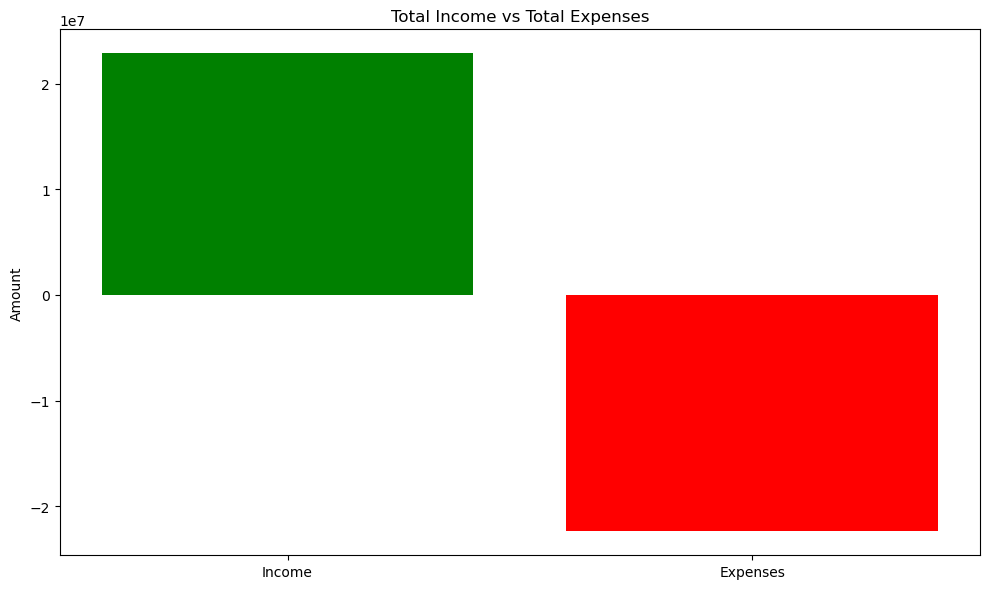

In [103]:
# 3. Visualize Total Income vs Expenses:
# Plot a bar chart comparing total income vs expenses
plt.figure(figsize=(10, 6))
plt.bar(['Income', 'Expenses'], [total_income, total_expenses], color=['green', 'red'])
plt.title('Total Income vs Total Expenses')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()



In [104]:
# 6.2)  Which categories or merchants contribute the most to expenses and income?

# Steps to Analyze Contribution to Income and Expenses:
# 1. Income by Category:

income_by_category = df[df['Amount'] > 0].groupby('Category')['Amount'].sum()

# Display the top contributing categories to income
income_by_category.sort_values(ascending=False)



Category
Utilities        4.316511e+06
Entertainment    4.192668e+06
Rent             4.074494e+06
Groceries        4.058600e+06
Salary           3.993765e+06
Name: Amount, dtype: float64

In [105]:
# 2. Expenses by Category:
# Filter for negative Amount (Expenses)
expenses_by_category = df[df['Amount'] < 0].groupby('Category')['Amount'].sum()

# Display the top contributing categories to expenses (absolute value to focus on the amount spent)
expenses_by_category = expenses_by_category.abs()  # Use absolute value to focus on magnitude of expenses
expenses_by_category.sort_values(ascending=False)


Category
Entertainment    4.148248e+06
Salary           4.145658e+06
Utilities        4.117571e+06
Groceries        3.971973e+06
Rent             3.957856e+06
Name: Amount, dtype: float64

In [109]:
# 3. Income by Merchant:
# Income by Merchant
income_by_merchant = df[df['Amount'] > 0].groupby('Merchant')['Amount'].sum()

# Display the top contributing merchants to income
income_by_merchant.sort_values(ascending=False)


Merchant
Store D    5.282251e+06
Store B    5.213019e+06
Store C    5.138203e+06
Store A    5.085121e+06
Name: Amount, dtype: float64

In [110]:
#4. Expenses by Merchant :
# Expenses by Merchant
expenses_by_merchant = df[df['Amount'] < 0].groupby('Merchant')['Amount'].sum()

# Display the top contributing merchants to expenses (absolute value to focus on amount spent)
expenses_by_merchant = expenses_by_merchant.abs()  # Use absolute value to focus on magnitude of expenses
expenses_by_merchant.sort_values(ascending=False)



Merchant
Store A    5.183982e+06
Store B    5.030154e+06
Store D    5.011765e+06
Store C    4.986724e+06
Name: Amount, dtype: float64

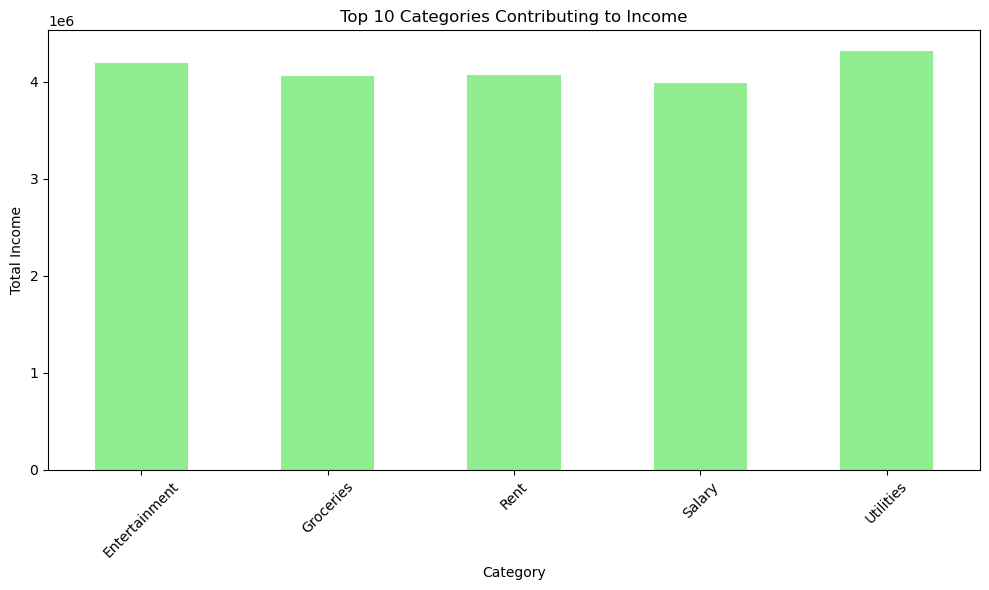

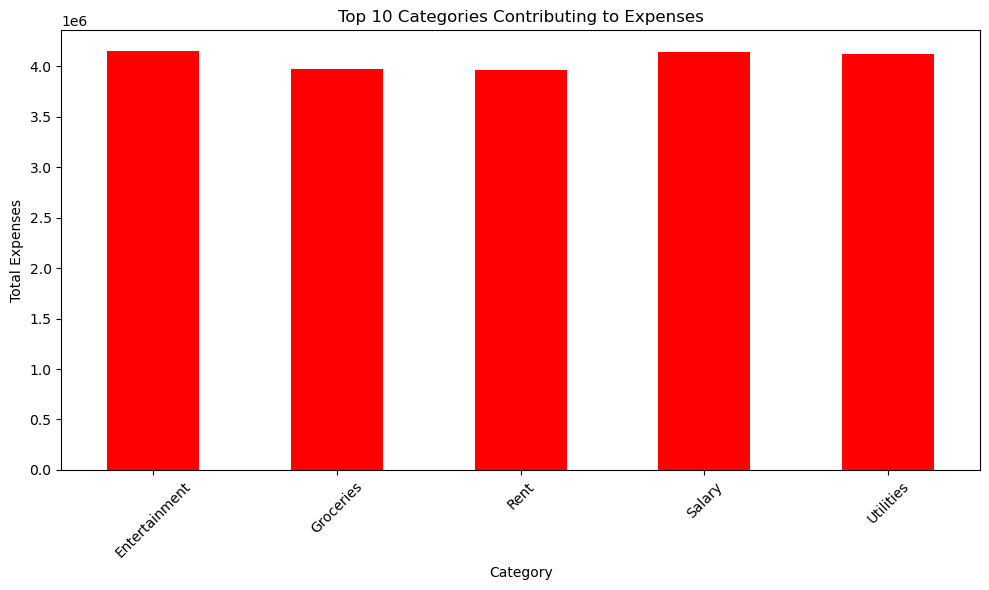

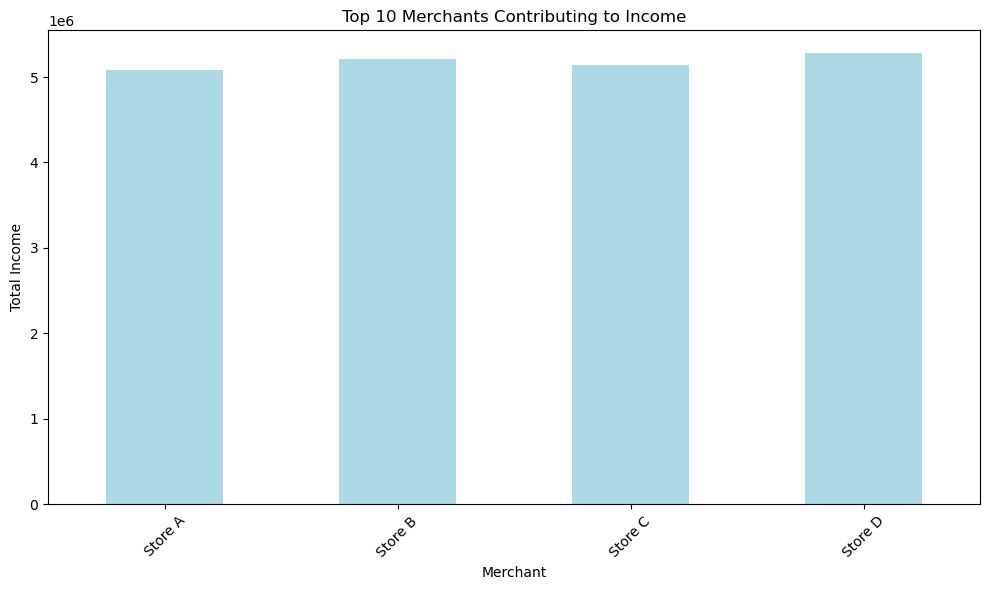

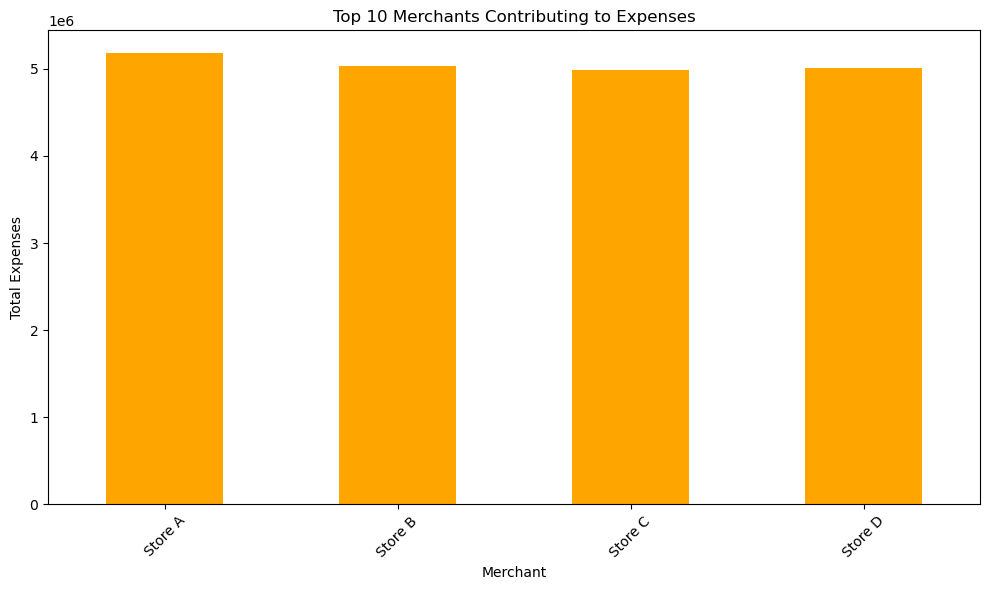

In [111]:
# 5. Visualize Top Contributors:
# Plot top categories contributing to income
plt.figure(figsize=(10, 6))
income_by_category.head(10).plot(kind='bar', color='lightgreen', title='Top 10 Categories Contributing to Income')
plt.xlabel('Category')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top categories contributing to expenses
plt.figure(figsize=(10, 6))
expenses_by_category.head(10).plot(kind='bar', color='red', title='Top 10 Categories Contributing to Expenses')
plt.xlabel('Category')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top merchants contributing to income
plt.figure(figsize=(10, 6))
income_by_merchant.head(10).plot(kind='bar', color='lightblue', title='Top 10 Merchants Contributing to Income')
plt.xlabel('Merchant')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top merchants contributing to expenses
plt.figure(figsize=(10, 6))
expenses_by_merchant.head(10).plot(kind='bar', color='orange', title='Top 10 Merchants Contributing to Expenses')
plt.xlabel('Merchant')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [123]:
# 6.3)  What is the net profit/loss trend over time?

#. Group by Date and Sum Amount:
# Group by Date and calculate the sum of Amount (net profit/loss) for each day
net_profit_loss_by_date = df.groupby(df['Date'].dt.date)['Amount'].sum()

# Display the result
net_profit_loss_by_date.head()


Date
2020-01-01    168752.513320
2020-01-02    -43290.842381
2020-01-03   -100818.090960
2020-01-04     11276.032461
2020-01-05    228827.689751
Name: Amount, dtype: float64

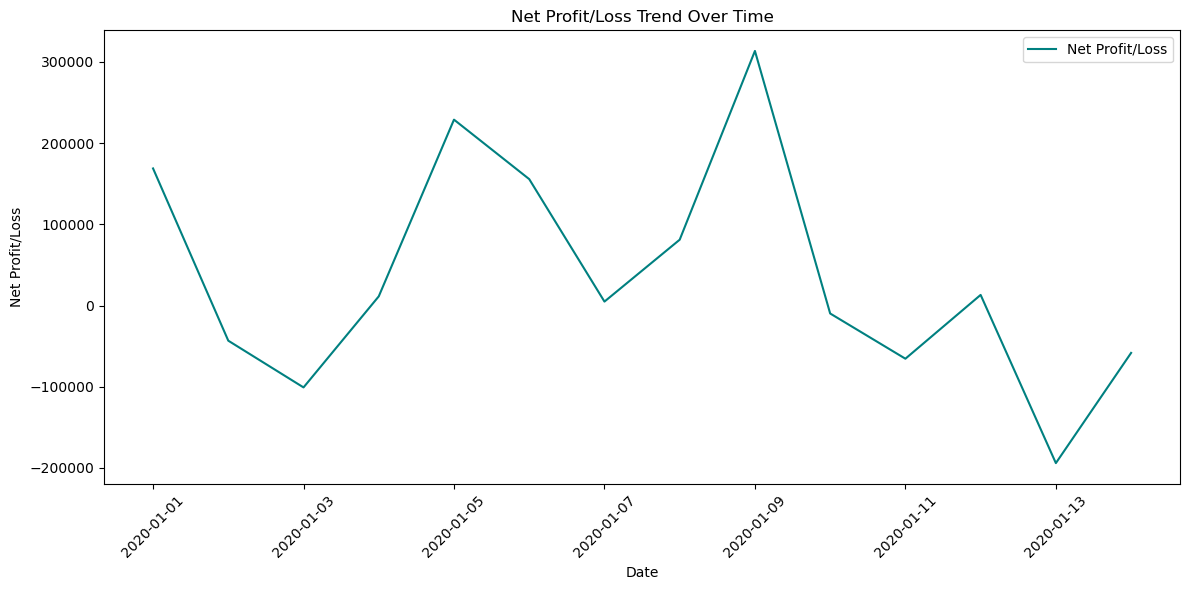

In [113]:
# 3. Visualize the Net Profit/Loss Trend:
# Plot the net profit/loss trend over time
plt.figure(figsize=(12, 6))
plt.plot(net_profit_loss_by_date.index, net_profit_loss_by_date.values, color='teal', label='Net Profit/Loss')
plt.title('Net Profit/Loss Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Net Profit/Loss')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


# 7. Location-Based Insights


In [114]:
# 7.1)  How do transaction counts and amounts vary by Location?

#Steps to Analyze Transaction Counts and Amounts by Location:
#1. Transaction Count by Location:
# Calculate transaction count by Location
transaction_count_by_location = df.groupby('Location').size()

# Display the result
transaction_count_by_location.sort_values(ascending=False)


Location
City A    5084
City C    5017
City B    5016
City D    4883
dtype: int64

In [115]:
# 2. Total Amount by Location :
# Calculate total Amount by Location
total_amount_by_location = df.groupby('Location')['Amount'].sum()

# Display the result
total_amount_by_location.sort_values(ascending=False)


Location
City C    506882.740677
City A    199191.180977
City D    103237.717598
City B   -304258.154630
Name: Amount, dtype: float64

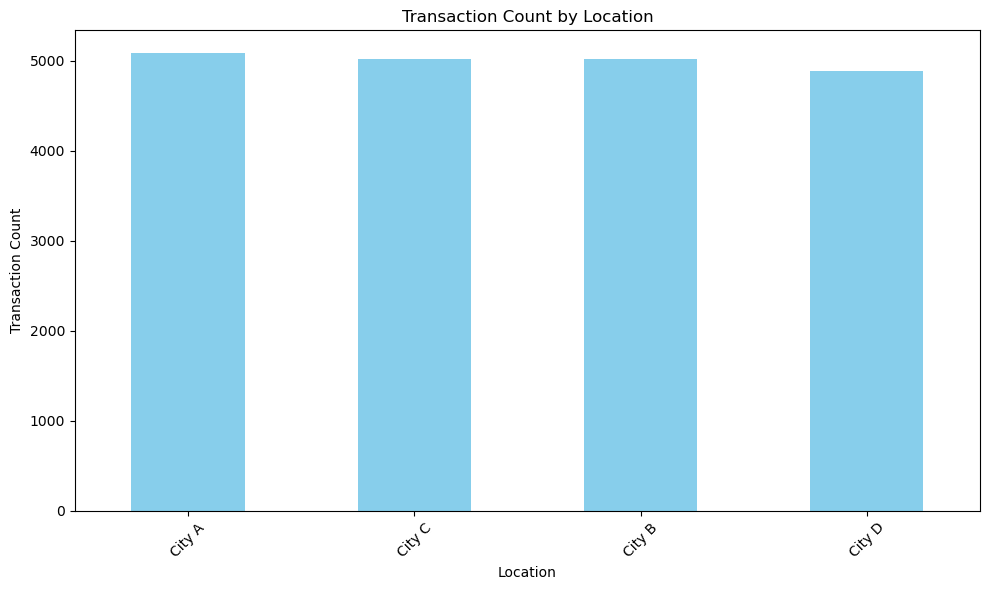

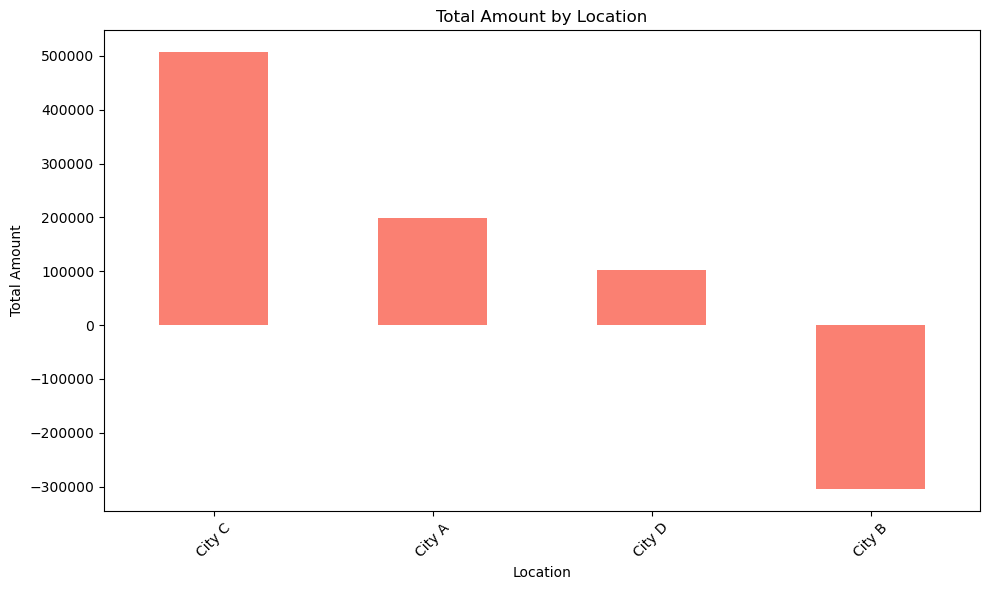

In [116]:
# Visualize Transaction Counts and Amounts by Location :
# Plot transaction counts by Location
plt.figure(figsize=(10, 6))
transaction_count_by_location.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Transaction Count by Location')
plt.xlabel('Location')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot total Amount by Location
plt.figure(figsize=(10, 6))
total_amount_by_location.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Total Amount by Location')
plt.xlabel('Location')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [117]:
# 7.2)  Are certain Locations more prone to fraudulent activities :

# Steps to Analyze Fraud Rates by Location:
# 1. Fraud Count and Rate by Location:
# Filter for fraudulent transactions (IsFraud = 1)
fraud_data = df[df['IsFraud'] == 1]

# Calculate fraud count by Location
fraud_count_by_location = fraud_data.groupby('Location').size()

# Calculate total transaction count by Location
total_transaction_count_by_location = df.groupby('Location').size()

# Calculate fraud rate by Location (percentage of fraudulent transactions)
fraud_rate_by_location = (fraud_count_by_location / total_transaction_count_by_location) * 100

# Display the fraud rate by location, sorted in descending order
fraud_rate_by_location.sort_values(ascending=False)


Location
City C    4.983058
City D    4.730698
City A    4.661684
City B    4.485646
dtype: float64

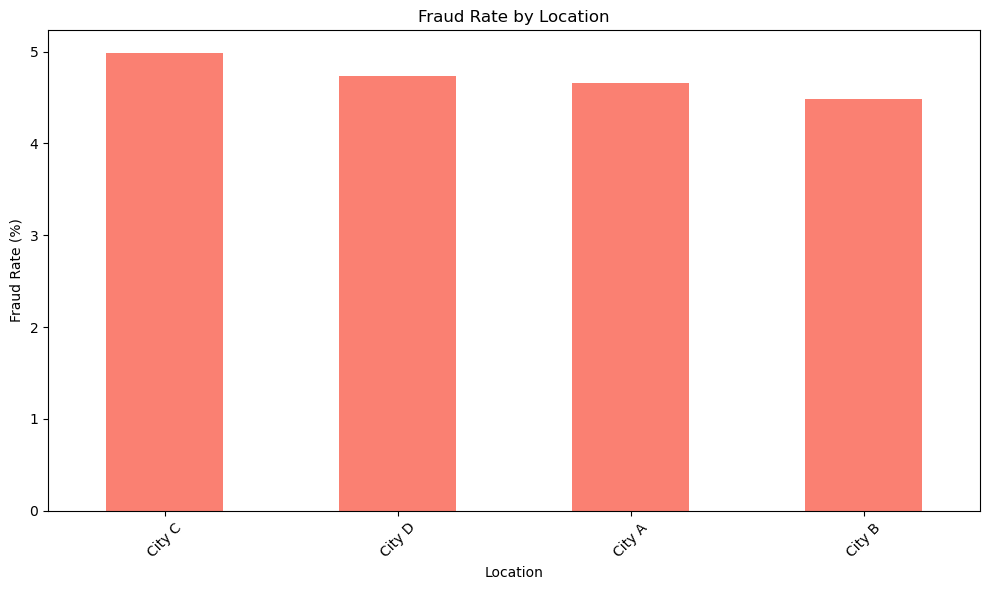

In [31]:
# Visualize Fraud Rate by Location:
# Plot fraud rate by Location
plt.figure(figsize=(10, 6))
fraud_rate_by_location.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Fraud Rate by Location')
plt.xlabel('Location')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [119]:
# 7.3)  Which Locations contribute the most to total revenue?

# Steps to Analyze Total Revenue by Location:
# 1. Filter for Income Transactions:

# Filter for income transactions (positive Amount)
income_data = df[df['Amount'] > 0]

# Calculate total income by Location
total_income_by_location = income_data.groupby('Location')['Amount'].sum()

# Display the result
total_income_by_location.sort_values(ascending=False)


Location
City C    5.984918e+06
City A    5.788682e+06
City D    5.595820e+06
City B    5.527942e+06
Name: Amount, dtype: float64

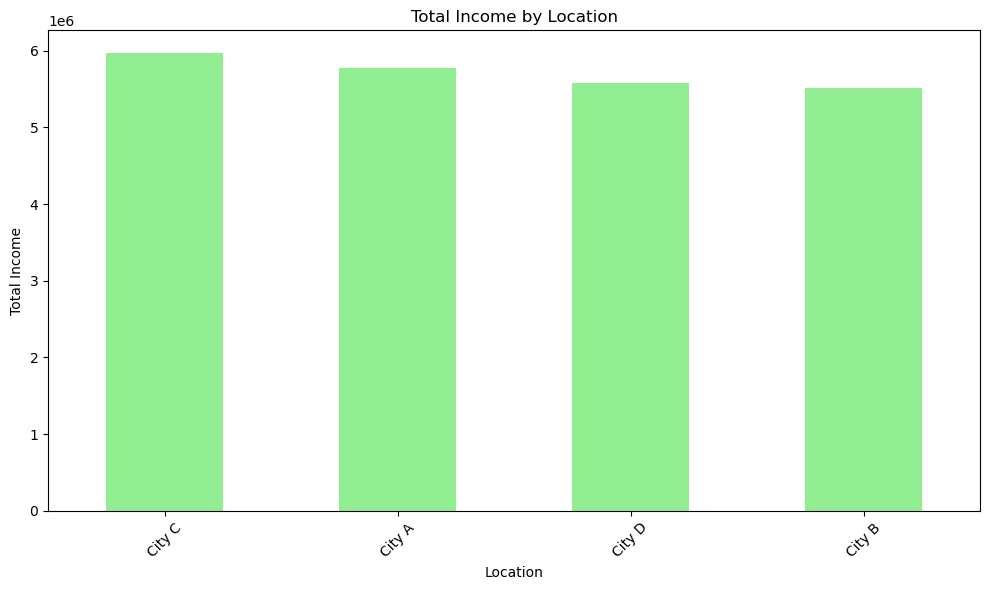

In [33]:
# 2. Visualize Total Income by Location:
# Plot total income by Location
plt.figure(figsize=(10, 6))
total_income_by_location.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Total Income by Location')
plt.xlabel('Location')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
